<a href="https://colab.research.google.com/github/shraddhawakde98/ICC-Data-Analysis/blob/main/Self_Project_Cricket_Scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The data consists of 1417 T20 matches. Each row corresponds to a single T20 match. The main objective is to get the scorecard of each match. The function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.**

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ast import literal_eval

In [2]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Reading the csv file from the drive
working_directory = '/content/drive/MyDrive/Amabetter/Module 1 : Python for Data Science/ Projects and Assessments - 3/dat/'
df = pd.read_csv(working_directory + 'International_T20_Data.csv')

In [7]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Exploratory Data Analysis (EDA)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   meta.data_version            1417 non-null   float64
 2   meta.created                 1417 non-null   object 
 3   meta.revision                1417 non-null   int64  
 4   info.dates                   1417 non-null   object 
 5   info.gender                  1417 non-null   object 
 6   info.match_type              1417 non-null   object 
 7   info.outcome.by.wickets      651 non-null    float64
 8   info.outcome.winner          1372 non-null   object 
 9   info.overs                   1417 non-null   int64  
 10  info.player_of_match         1255 non-null   object 
 11  info.teams                   1417 non-null   object 
 12  info.toss.decision           1417 non-null   object 
 13  info.toss.winner  

**Rename all the column names to their appropriate names, for example meta.data_version should be renamed as data_version**

In [9]:
#first replace . with _ then it gives info_ and meta_ and replace them with ''
df.columns = [ x.replace('.','_').replace('info_','').replace('meta_','') for x in list(df.columns)]

In [10]:
df.columns 

Index(['innings', 'data_version', 'created', 'revision', 'dates', 'gender',
       'match_type', 'outcome_by_wickets', 'outcome_winner', 'overs',
       'player_of_match', 'teams', 'toss_decision', 'toss_winner', 'umpires',
       'venue', 'city', 'outcome_by_runs', 'match_type_number',
       'neutral_venue', 'outcome_method', 'outcome_result',
       'outcome_eliminator', 'supersubs_New Zealand', 'supersubs_South Africa',
       'bowl_out', 'outcome_bowl_out'],
      dtype='object')

In [11]:
df.head(2)

,innings,data_version,created,revision,dates,gender,match_type,outcome_by_wickets,outcome_winner,overs,...,outcome_by_runs,match_type_number,neutral_venue,outcome_method,outcome_result,outcome_eliminator,supersubs_New Zealand,supersubs_South Africa,bowl_out,outcome_bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Calculating the top three venues which hosted the greatest number of matches.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


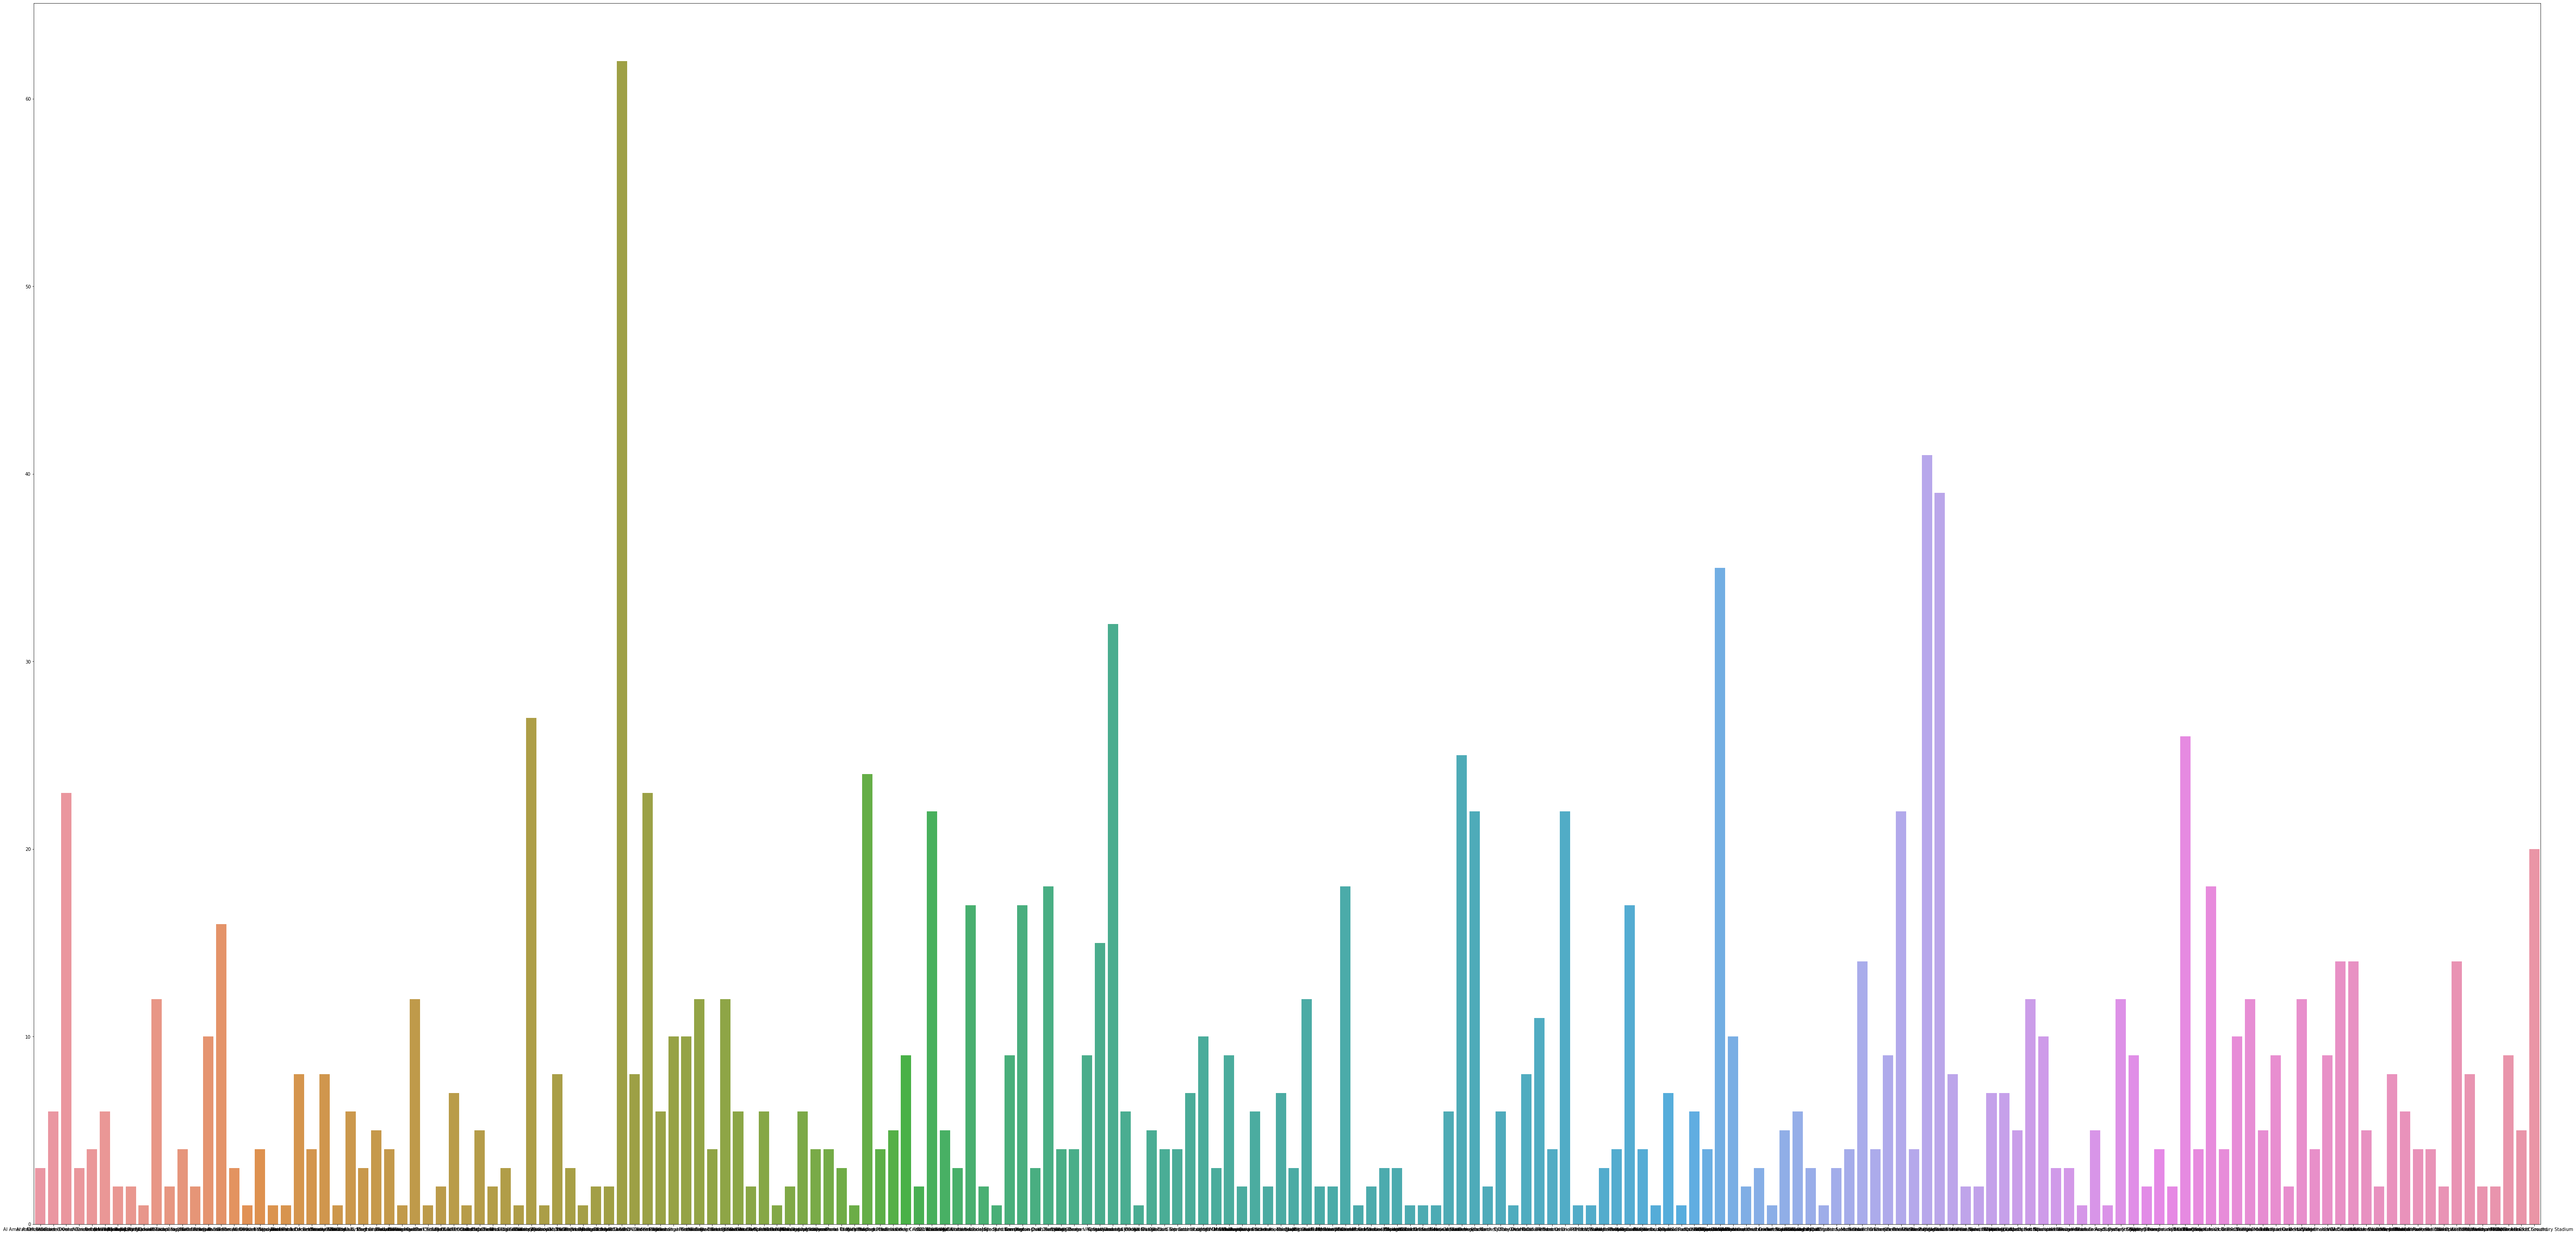

In [13]:
x,y = np.unique(df['venue'],return_counts=True)
sns.barplot(x,y)
plt.rcParams['figure.figsize'] = (100,80)

In [14]:
#No. of times the venue repeated means it is the venue which hosted greatest no of matches
venue_df = pd.DataFrame(df.groupby('venue')['venue'].count().sort_values(ascending = False)[0:3])

In [15]:
print(f"the top three venues which hosted the greatest number of matches are \n{venue_df['venue']}")

the top three venues which hosted the greatest number of matches are 
venue
Dubai International Cricket Stadium    62
Sheikh Zayed Stadium                   41
Shere Bangla National Stadium          39
Name: venue, dtype: int64


**Calculating the pair of cricket teams who played the most number of T20 matches against each other.**

In [16]:
df['team1'] = df['teams'].apply(lambda x : literal_eval(x)[0])
df['team2'] = df['teams'].apply(lambda x : literal_eval(x)[1])

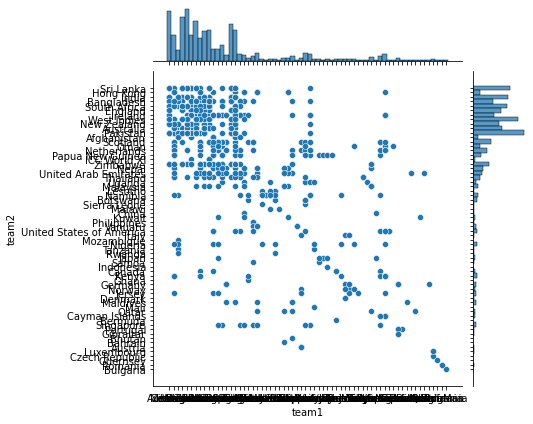

In [17]:
sns.jointplot( x = 'team1', y ='team2', data = df)
sns.set(rc = {'figure.figsize':(100,50)})

In [18]:
def find_index(a,val):
  for i in range(len(a)):
    for j in range(len(a)):
      if a[i,j]==val:
        return i,j

In [19]:
#Sorting the list
teams = sorted(list(set(df['team1'])|set(df['team2'])))

In [20]:
match_matrix = np.zeros((len(teams),len(teams)),dtype=list)

In [21]:
for i,row in df.iterrows():
  match_matrix[teams.index(row['team1'])][teams.index(row['team2'])]+=1
  match_matrix[teams.index(row['team2'])][teams.index(row['team1'])]+=1

In [22]:
#Calculate teams index
teams_index = find_index(match_matrix, match_matrix.max())

In [23]:
print(f'The pair of cricket teams who played the most number of T20 matches against each other are {teams[teams_index[0]]} and {teams[teams_index[-1]]} and they played a total of {match_matrix.max()} games')

The pair of cricket teams who played the most number of T20 matches against each other are Australia and England and they played a total of 45 games


**Print the top five teams by their win percentages.Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.** 

In [24]:
#changing the 'teams' column from str to list type
df['teams'] = df['teams'].apply(lambda x : literal_eval(x))

In [25]:
#exploding
top_5 = df.explode("teams")[['teams','outcome_winner']]

In [26]:
#creating new DF win percentage countries
win_percentage_countries = pd.DataFrame(columns=['winning_percentage'])

for i in top_5['teams'].unique():
  win_percentage_countries.loc[i] = (list(top_5['outcome_winner']).count(i)/2)*100/list(top_5['teams']).count(i)

In [27]:
#soring the top 5 values in descending order
win_percentage_countries.sort_values("winning_percentage",ascending=False)[:5]

,winning_percentage
Belgium,100.000000
Spain,83.333333
Germany,76.470588
Namibia,73.529412
Afghanistan,68.000000


**A function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.**

In [28]:
# top 4 scorers of first bat, top 4 bowlers opponenet team
# top 4 scorers of second bat , top 4 bowlers opponenet team

In [29]:
def find_deliveries(lod):
  keys = []
  for i in lod:
    keys += list(i.keys())
  return keys

In [30]:
def generate_scorecard(lod):
  scorecard = {}
  delivery_list = find_deliveries(lod)
  for ball,dic in zip(delivery_list,lod):
    a = dic[ball]   # inner dictionary containing {batman,bowler,nonstricker, runs and wicket}
    if a['batsman'] in scorecard.keys():
      scorecard[a['batsman']]['Runs'] += a['runs']['batsman']
      scorecard[a['batsman']]['Balls_Played'] += 1
    else:
      scorecard[a['batsman']] = {'Player': a['batsman'],'Runs':a ['runs']['batsman'], 'Balls_Played': 0, 'Balls_Bowled' :0,'Runs_given':0,'wicket':0}

    #######

    if a['non_striker'] not in scorecard.keys():
      scorecard[a['non_striker']]={'Player': a['non_striker'],'Runs': 0, 'Balls_Played': 0, 'Balls_Bowled' :0,'Runs_given':0,'wicket':0}

    #######

    if a['bowler'] in scorecard.keys():
      wicket = 0
      if a.get('wicket'):
        wicket =1
      scorecard[a['bowler']]['Runs_given']+= a['runs']['total']
      scorecard[a['bowler']]['Balls_Bowled']+= 1
      scorecard[a['bowler']]['wicket']+= wicket
    else:
      wicket =0
      if a.get('wicket'):
        wicket = 1
      scorecard[a['bowler']]={'Player': a['bowler'],'Runs': 0, 'Balls_Played': 0, 'Balls_Bowled' :1,'Runs_given':a['runs']['total'],'wicket': wicket}

   #######
  return pd.DataFrame(scorecard.values())

In [31]:
def find_sr_and_economy(df):
  df['Strike_Rate'] = np.nan
  for i,row in df.iterrows():
    if row['Balls_Played'] !=0:
      df.loc[i,'Strike_Rate'] = round(row['Runs']/row['Balls_Played']*100)
  df['Economy']= np.nan
  for i,row in df.iterrows():
    if row['Balls_Bowled']!=0:
      df.loc[i,"Economy"] = round(row['Runs_given']/row['Balls_Bowled']*6,2)

  return df

In [32]:
def find_top_scorers(innings):
  '''
  Input innings as string
  '''
  df1 = generate_scorecard(eval(innings)[0]['1st innings']['deliveries'])
  df2 = generate_scorecard(eval(innings)[1]['2nd innings']['deliveries'])
  df1 = find_sr_and_economy(df1)
  df2 = find_sr_and_economy(df2)
  temp1_sr = df1.sort_values(by = ["Runs","Strike_Rate"],ascending = [False,False])[:4]
  temp1_ec = df1.sort_values(by = "Economy")[:4]
  temp2_sr = df2.sort_values(by = ["Runs","Strike_Rate"],ascending = [False,False])[:4]
  temp2_ec = df2.sort_values(by = "Economy")[:4]
  df1 = temp1_sr.append(temp1_ec).reset_index().drop('index',axis=1)
  df2 = temp2_sr.append(temp2_ec).reset_index().drop('index',axis=1)
  return df1,df2

In [33]:
#Store the find top scoreres in df1 and df2
df1,df2 = find_top_scorers(df.iloc[10,0])

In [35]:
print("The top Players Scorecard 1st Inning")
df1


The top Players Scorecard 1st Inning


,Player,Runs,Balls_Played,Balls_Bowled,Runs_given,wicket,Strike_Rate,Economy
0,HM Amla,62,43,0,0,0,144.0,NaN
1,F du Plessis,36,25,0,0,0,144.0,NaN
2,JP Duminy,29,16,0,0,0,181.0,NaN
3,AB de Villiers,26,16,0,0,0,162.0,NaN
4,TA Boult,0,0,24,12,2,NaN,3.00
5,C de Grandhomme,0,0,19,22,2,NaN,6.95
6,MJ Santner,0,0,24,44,0,NaN,11.00
7,C Munro,0,0,6,11,0,NaN,11.00


In [36]:
print("The top Players Scorecard 2nd Inning")
df2

The top Players Scorecard 2nd Inning


,Player,Runs,Balls_Played,Balls_Bowled,Runs_given,wicket,Strike_Rate,Economy
0,TC Bruce,33,26,0,0,0,127.0,NaN
1,TG Southee,20,6,0,0,0,333.0,NaN
2,C de Grandhomme,15,8,0,0,0,188.0,NaN
3,KS Williamson,13,14,0,0,0,93.0,NaN
4,CH Morris,0,0,18,10,2,NaN,3.33
5,AL Phehlukwayo,0,0,19,19,3,NaN,6.00
6,Imran Tahir,0,0,23,24,5,NaN,6.26
7,D Paterson,0,0,12,14,0,NaN,7.00
